In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
df = pd.read_csv('Car_Mileage_DT_Toy.csv')
df

,Car Age,Mileage,Price
0,1,10,2000
1,1,12,3000
2,1,8,4000
3,3,11,2000
4,3,12,3000
5,3,10,2500
6,2,9,3000
7,2,8,4000
8,4,10,5000
9,4,12,1000


In [18]:
y = df['Price']
x = df.drop('Price', axis = 1)

In [19]:
c_name = list(x.columns)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dtr = DecisionTreeRegressor(max_depth = 2, random_state = 42)

In [22]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'Mileage <= 9.5\nsquared_error = 933593.75\nsamples = 8\nvalue = 2687.5'),
 Text(0.25, 0.5, 'Mileage <= 8.5\nsquared_error = 222222.222\nsamples = 3\nvalue = 3666.667'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 4000.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3000.0'),
 Text(0.75, 0.5, 'Car Age <= 3.5\nsquared_error = 440000.0\nsamples = 5\nvalue = 2100.0'),
 Text(0.625, 0.16666666666666666, 'squared_error = 171875.0\nsamples = 4\nvalue = 2375.0'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1000.0')]

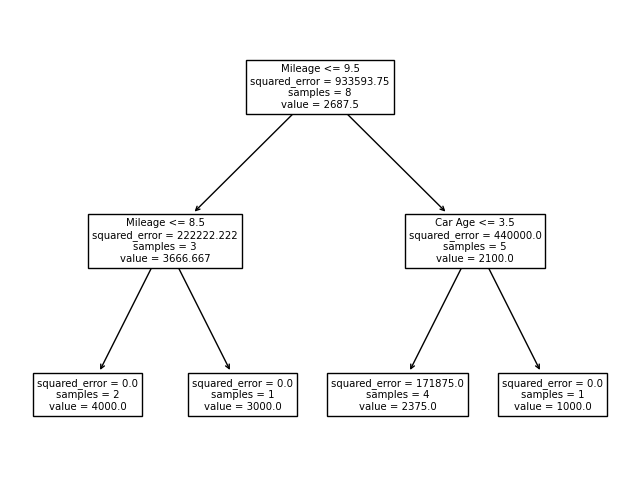

In [23]:
fig, ax = plt.subplots(figsize =(8,6))
plot_tree(dtr, feature_names=c_name)
plt.show()

In [24]:
prediction = dtr.fit(x_train, y_train).predict(x_test)
prediction

array([1000., 2375.])

In [25]:
np.array(y_test)

array([5000, 3000], dtype=int64)

In [26]:
def mse(price):
    se = 0
    avg = price.mean()
    for i in price:
        se = (i-avg)**2+se
    mse = se/len(price)
    return round(mse,2), round(avg,2)

In [27]:
df_train = pd.concat([x_train, y_train], axis =1)
df_train
mse(df_train.Price)

,Car Age,Mileage,Price
5,3,10,2500
0,1,10,2000
7,2,8,4000
2,1,8,4000
9,4,12,1000
4,3,12,3000
3,3,11,2000
6,2,9,3000


(933593.75, 2687.5)

In [28]:
df1_1 = df_train[df_train['Mileage']<=9.5]
df1_1
mse(df1_1.Price)

,Car Age,Mileage,Price
7,2,8,4000
2,1,8,4000
6,2,9,3000


(222222.22, 3666.67)

In [29]:
df1_2 = df_train[df_train['Mileage']>9.5]
df1_2
mse(df1_2.Price)

,Car Age,Mileage,Price
5,3,10,2500
0,1,10,2000
9,4,12,1000
4,3,12,3000
3,3,11,2000


(440000.0, 2100.0)

In [30]:
df2_1 = df1_1[df1_1['Mileage']<=8.5]
df2_1
mse(df2_1.Price)

,Car Age,Mileage,Price
7,2,8,4000
2,1,8,4000


(0.0, 4000.0)

In [31]:
df2_2 = df1_1[df1_1['Mileage']>8.5]
df2_2
mse(df2_2.Price)

,Car Age,Mileage,Price
6,2,9,3000


(0.0, 3000.0)

In [32]:
df2_3 = df1_2[df1_2['Car Age']<=3.5]
df2_3
mse(df2_3.Price)

,Car Age,Mileage,Price
5,3,10,2500
0,1,10,2000
4,3,12,3000
3,3,11,2000


(171875.0, 2375.0)

In [33]:
df2_4 = df1_2[df1_2['Car Age']>3.5]
df2_4
mse(df2_4.Price)

,Car Age,Mileage,Price
9,4,12,1000


(0.0, 1000.0)